In [2]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

- Here, MNIST_Shortened.csv is the path to the CSV file, delimiter=',' specifies that the values in the file are separated by commas, and skip_header=1 indicates that the first row of the file should be skipped because it contains the header.



In [3]:
mnist = np.genfromtxt('MNIST_Shortened.csv', delimiter=',', skip_header=1) 

# Define X and y 
 
X = mnist[:,0:784] 
y = mnist[:,-1] 
 


In [4]:
# Check dimensions of X 
X.shape


(6000, 784)

In [5]:
y.shape

(6000,)

- X[0] represents the first data point in the dataset X. This is often an image, which is a 2D array.

- The reshape(28,28) method is used to convert this 1D array back into a 2D array of size 28x28. This is the correct dimensions for the image, which represents a 28x28 pixel image.

- The plt.imshow() function is used to display the image on the screen. The cmap='gray_r' argument specifies that the image should be displayed in grayscale.

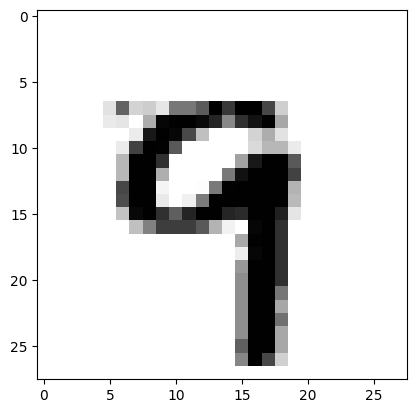

In [6]:
plt.imshow(X[0].reshape(28,28),cmap='gray_r')

- A for loop is used to iterate through the 100 random images from the dataset X. The dataset is assumed to have 6000 images of handwritten digits.

- Inside the loop, the plt.subplot() function is used to create a subplot within the figure. The subplot is a 10x10 grid of images, and the loop is iterating through each grid position from left to right and top to bottom.

- The plt.imshow() function is used to display the image on the grid. The image is reshaped to a 28x28 array using the reshape() method before being displayed. The cmap='gray_r' argument is used to specify that the image should be displayed in grayscale.

- The plt.axis('off') function is used to hide the axis lines for each subplot.

- After all 100 random images have been displayed in the subplots, the plt.show() function is used to display the figure on the screen.

- This code snippet is typically used for visualizing a small number of random images from a larger dataset. In this case, the images are grayscale images of handwritten digits

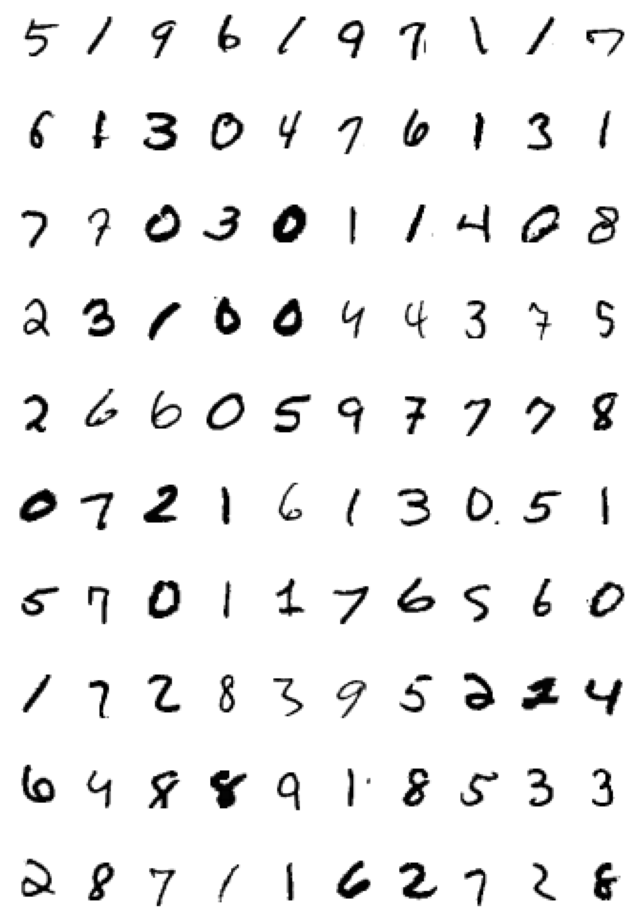

In [7]:
plt.figure(figsize=(8, 12))
for i in range(100):
    plt.subplot(10,10,i+1) 
    plt.imshow(X[np.random.randint(0,6000)].reshape(28,28),cmap='gray_r') 
    plt.axis('off') 
 
plt.show()

In [8]:
# Split data into train and test sets 
 
from sklearn.model_selection import train_test_split 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) 


#### (1)  Using VarianceThreshold to remove low or no variance features

- The VarianceThreshold feature selection algorithm removes all features whose variance doesn't meet the specified threshold. By setting the threshold to 0, the algorithm removes all features with zero variance, i.e., all constant features.

- In this case, we use the fit_transform() method on the training set X_train to select the features. This method applies the learned threshold on the training set and simultaneously applies it on the test set X_test.

- After executing the code, we will see the number of removed features and the number of remaining features in the output. For example, if the initial dataset has 100 features and 10 features have been removed, the remaining features will be 90.

- To visualize the remaining features, you can use any visualization library in Python. Here's an example of how to do it using the matplotlib library:

In [9]:
from sklearn.feature_selection import VarianceThreshold 
variance_selector = VarianceThreshold(threshold=0) 
X_train_fs = variance_selector.fit_transform(X_train) 
X_test_fs = variance_selector.transform(X_test) 
 
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

118 features have been removed, 666 features remain


In [10]:
# We can use the get_support function to see which features have been dropped 
 
selected_features = variance_selector.get_support() 
selected_features = selected_features.reshape(28,28) 
# Visualise which pixels have been dropped 

df =pd.DataFrame(selected_features)
df


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
3,False,False,True,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
5,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
6,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<Axes: >

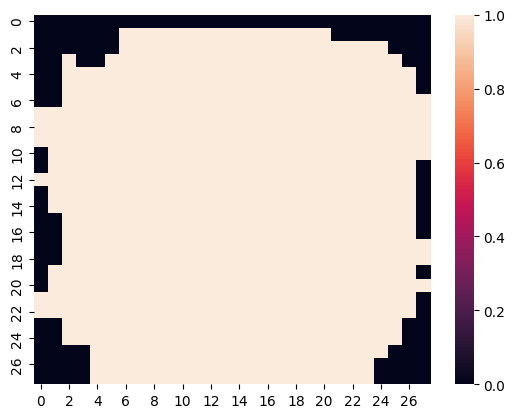

In [11]:
# Visualise which pixels have been dropped 
sns.heatmap(selected_features,cmap='rocket')

The black pixels in the grid are those which have been dropped due to zero variance. 
Unsurprisingly, these are the pixels around the edges and the corners of the image, given 
that the digits are centered in the middle of the 28x28 image.

#### (2) Filter Methods Using SelectKBest

- Use the SelectKBest class from sklearn to select the 200 best features based on the chi-squared test.
- Apply the fit_transform() method to the training set and the transform() method to the test set. This will select the 200 best features from each dataset.
- By executing these steps, you will select the 200 best features from your selected_features data. Remember to adjust the data and parameters according to your specific requirements.

In [12]:
# Use the SelectKBest selector from sklearn to select the k features 
# with the best scores on a selected test statistic 
 
from sklearn.feature_selection import SelectKBest, f_classif 
selector = SelectKBest(f_classif, k=200) 
X_train_fs = selector.fit_transform(X_train_fs, y_train) 
X_test_fs = selector.transform(X_test_fs)

- Use the get_support() method of the variance selector to get a boolean array indicating whether a feature is selected or not. The indices=True parameter ensures that the boolean array's indices correspond to the indices of the selected features in the original features matrix
-  selected_features_boolean is a boolean array of the same length as your original features matrix, where True values correspond to selected features and False values correspond to non-selected features.

In [13]:
# Create boolean array for all features 
 
new_features_indices = \
variance_selector.get_support(indices=True)[selector.get_support()] 
new_features_boolean = np.isin(np.arange(784), new_features_indices)

<Axes: >

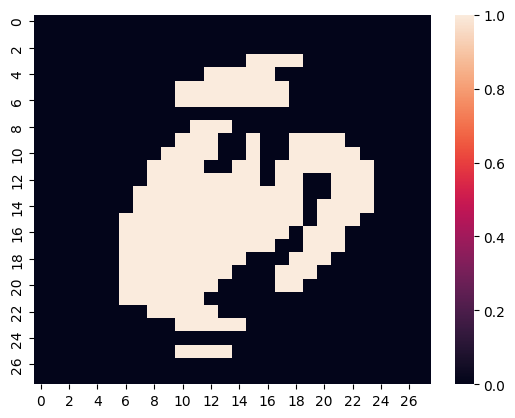

In [14]:
# Reshape and plot as a heatmap 
sns.heatmap(new_features_boolean.reshape(28,28),cmap='rocket')